In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CardioGoodFitness.csv')

In [3]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [5]:
data.shape

(180, 9)

In [6]:
(data.isnull().sum()/len(data))*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

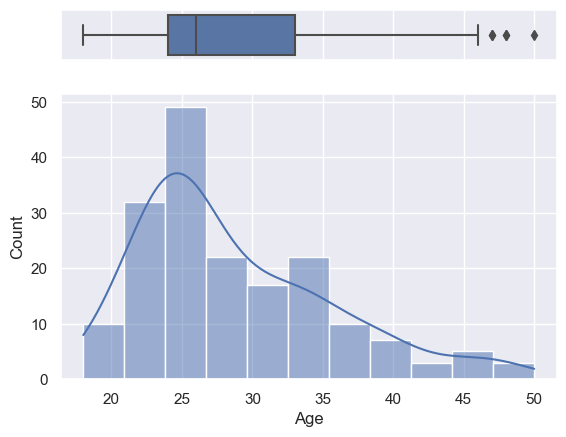

In [7]:
#Univariate analysis

sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Age', ax=ax_box)
sns.histplot(data=data, x="Age", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

In [8]:
#Treating outliars

Q3 = data['Age'].quantile(0.75)
Q1 = data['Age'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
print(upper,lower)

46.5 10.5


In [9]:
data = data[(data['Age']>lower) & (data['Age']<upper)]

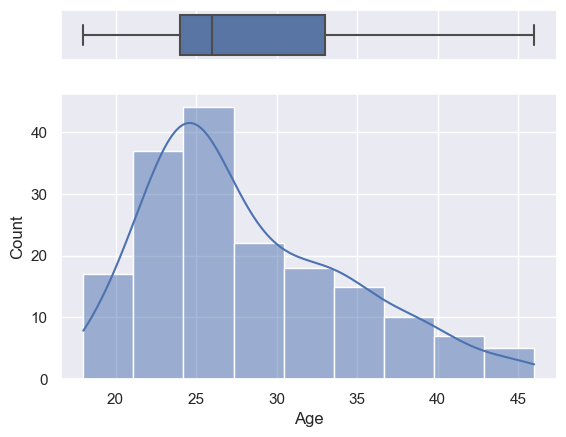

In [10]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Age', ax=ax_box)
sns.histplot(data=data, x="Age", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

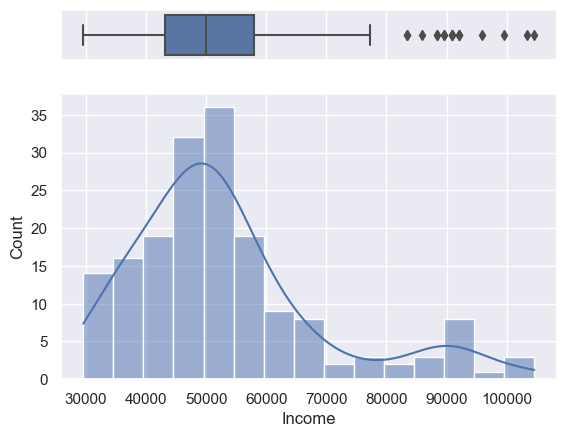

In [11]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Income', ax=ax_box)
sns.histplot(data=data, x="Income", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()


In [12]:
Q3 = data['Income'].quantile(0.75)
Q1 = data['Income'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
print(upper,lower)

80158.5 21034.5


In [13]:
data = data[(data['Income']>lower) & (data['Income']<upper)]

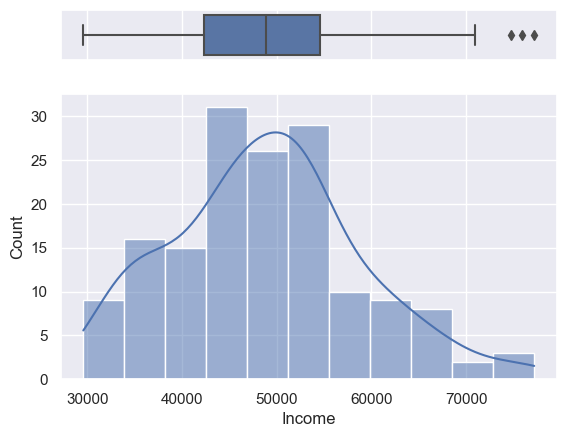

In [14]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Income', ax=ax_box)
sns.histplot(data=data, x="Income", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

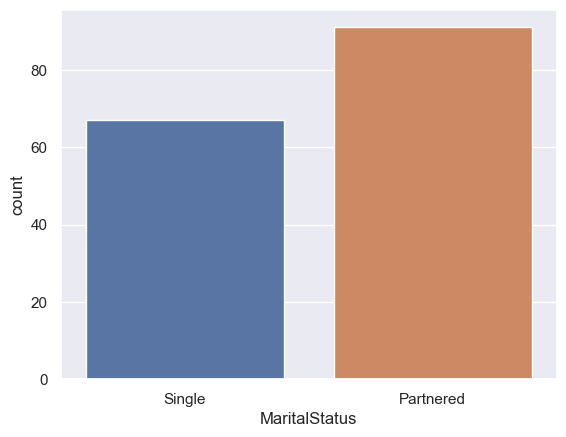

In [15]:
sns.countplot(data=data,x='MaritalStatus')
plt.show()

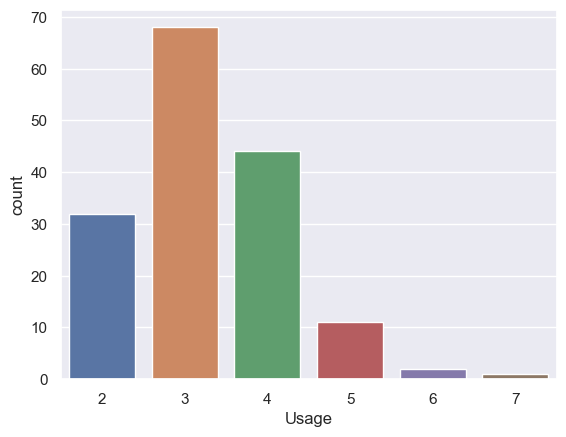

In [16]:
sns.countplot(data=data,x="Usage")
plt.show()

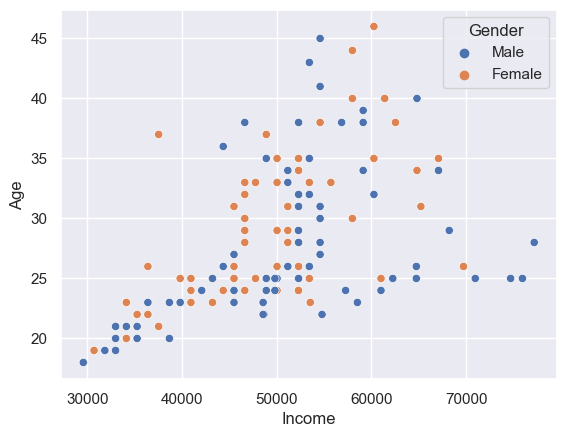

In [17]:
sns.scatterplot(data=data,x='Income',y='Age',hue='Gender')
plt.show()

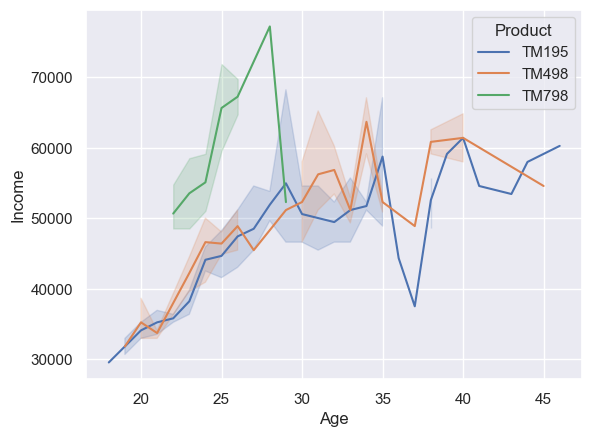

In [18]:
sns.lineplot(data=data,x='Age',y='Income',hue="Product")
plt.show()

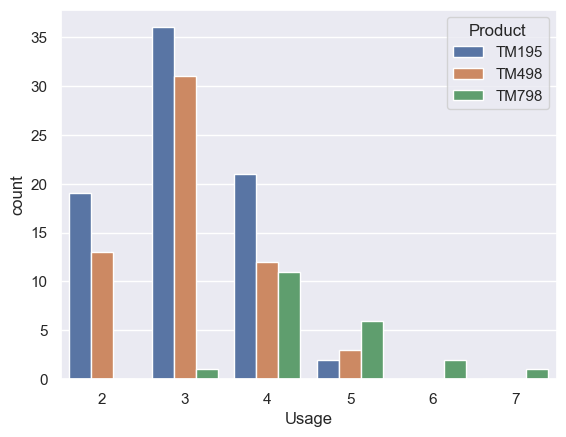

In [19]:
sns.countplot(data=data,x="Usage",hue="Product")
plt.show()

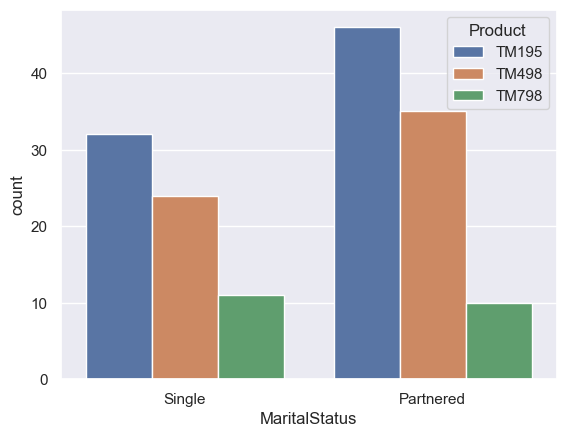

In [20]:
sns.countplot(data=data,x='MaritalStatus',hue="Product")
plt.show()

In [21]:
pd.crosstab(index=data['Gender'],columns=data['Product'],margins=True,normalize=True)*100

Product,TM195,TM498,TM798,All
Gender,,,,
Female,24.683544,18.354430,2.531646,45.56962
Male,24.683544,18.987342,10.759494,54.43038
All,49.367089,37.341772,13.291139,100.00000


C:\Users\vinay\AppData\Local\Temp\ipykernel_12404\2246898758.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


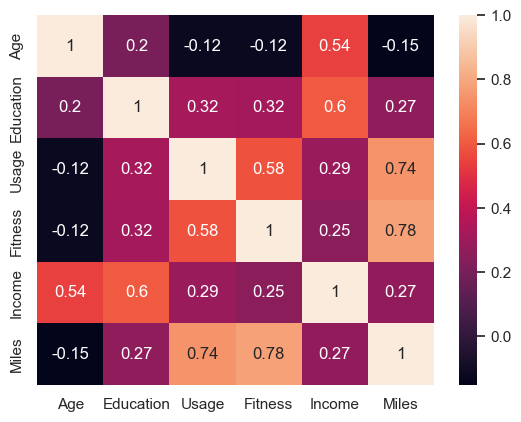

In [22]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [23]:
data.groupby(['MaritalStatus','Product']).Usage.value_counts()

MaritalStatus  Product  Usage
Partnered      TM195    3        22
                        2        12
                        4        11
                        5         1
               TM498    3        17
                        2         9
                        4         6
                        5         3
               TM798    4         5
                        5         2
                        6         2
                        7         1
Single         TM195    3        14
                        4        10
                        2         7
                        5         1
               TM498    3        14
                        4         6
                        2         4
               TM798    4         6
                        5         4
                        3         1
Name: Usage, dtype: int64

In [24]:
data.groupby(['MaritalStatus','Gender','Product']).Usage.count()

MaritalStatus  Gender  Product
Partnered      Female  TM195      26
                       TM498      15
                       TM798       1
               Male    TM195      20
                       TM498      20
                       TM798       9
Single         Female  TM195      13
                       TM498      14
                       TM798       3
               Male    TM195      19
                       TM498      10
                       TM798       8
Name: Usage, dtype: int64

In [25]:
data.groupby(['Gender','Product'])['Usage'].count()

Gender  Product
Female  TM195      39
        TM498      29
        TM798       4
Male    TM195      39
        TM498      30
        TM798      17
Name: Usage, dtype: int64

In [ ]:
#From the above data we can say -
#TM498 is bought more by Single females
#TM195 remains good choice for Partnered females
#A partnered male is equally likely to buy TM195 and TM498
#Single male is more likely to buy either TM195 or TM798

